In [1]:
import pymysql #Allows the connection to mysql
import pandas as pd #We need pandas to obtain a Data Frame
import getpass # function to prompt a cell to write down our password
from sqlalchemy import create_engine #Method to produce an engine based on a URL, that includes, host, user....
import matplotlib.pyplot as plt #Importing this library for plot generation
import pylab #It allows to manipulate matplotlib labels
import warnings #It helps to get rid of annoying warnings

In [2]:
user = getpass.getuser()
password = getpass.getpass(prompt="Please enter your MySQL password",stream=None)
engine = create_engine('mysql+pymysql://{}:{}@localhost:3306/classicmodels'.format(user,password))
connection = pymysql.connect(host='localhost',user=user,password=password,db='classicmodels')

Please enter your MySQL password········


In [3]:
a="""SELECT 
        CONCAT(firstName, ' ', lastName) AS employee,
        SUM(quantityOrdered*priceEach) AS totalSales
FROM    orderdetails JOIN orders USING (orderNumber)
        JOIN customers USING (customerNumber)
        JOIN employees ON
        customers.salesRepEmployeeNumber = employees.employeeNumber
GROUP BY    salesRepEmployeeNumber
ORDER BY    totalSales DESC;""" 

In [4]:
salesRep=pd.read_sql_query(a,engine)

In [5]:
pd.DataFrame(salesRep, columns=['employee', 'totalSales' ])#Creating the data frame

,employee,totalSales
0,Gerard Hernandez,1258577.81
1,Leslie Jennings,1081530.54
2,Pamela Castillo,868220.55
3,Larry Bott,732096.79
4,Barry Jones,704853.91
5,George Vanauf,669377.05
6,Peter Marsh,584593.76
7,Loui Bondur,569485.75
8,Andy Fixter,562582.59
9,Steve Patterson,505875.42


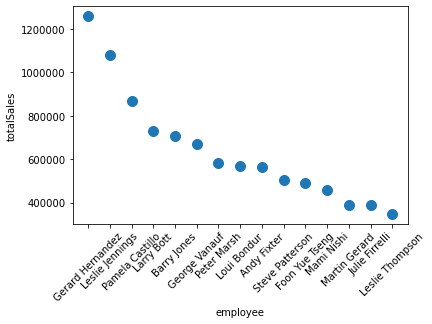

In [6]:
# Plotting the scatter chart for above dataframe
salesRep.plot.scatter(x='employee',y='totalSales',s=100)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 45)
current_values = plt.gca().get_yticks()
warnings.filterwarnings('ignore')
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values]);